# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# 2. Check how many records do we have


In [26]:
df = pd.read_excel('/Users/virendra.sehrawat/Projects/GL/Supervised_Learning/log_regression_practice/German_Credit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 3. Plot Histogram for column 'CreditAmount'

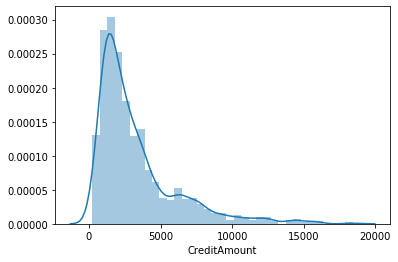

In [27]:
sns.distplot(df['CreditAmount'])

# 3b. Create creditability dataframe

In [28]:
amountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
amountInterval = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i+1]) for i in np.arange(len(amountIntervalsPoints) - 1)]
amountInterval

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [29]:
amountIntervalsDf = pd.DataFrame(amountInterval, columns=['intervalLeftSide','intervalRightSide'])
amountIntervalsDf

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [30]:
#credibility table preparation
credibility0 = []
credibility1 = []

for interval in amountInterval:
    subData = df[df['CreditAmount'] >= interval[0]]
    subData = subData[subData['CreditAmount'] < interval[1]]
    credibility0.append(sum(subData['Creditability'] == 0))
    credibility1.append(sum(subData['Creditability'] == 1))

print(credibility0, credibility1)

[3, 34, 51, 33, 26, 75, 34, 20, 21, 3] [15, 64, 139, 93, 79, 200, 68, 26, 14, 2]


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [31]:
tempdf = pd.DataFrame(np.column_stack([credibility0, credibility1]),
columns = ['Credibility0', 'Credibility1'])
tempdf


,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


In [32]:
compareCreditWorthinessDf = pd.concat([amountIntervalsDf.reset_index(drop=True), tempdf], axis=1)

compareCreditWorthinessDf['total'] = compareCreditWorthinessDf['Credibility0'] + compareCreditWorthinessDf['Credibility1']

compareCreditWorthinessDf


,intervalLeftSide,intervalRightSide,Credibility0,Credibility1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

Text(0.5, 1.0, 'Creditworthiness plot for Credibility == 0')

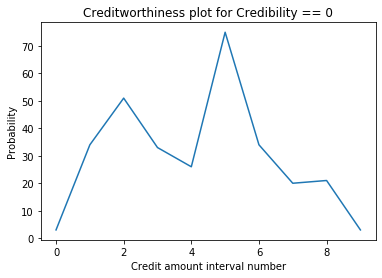

In [37]:
plt.plot(compareCreditWorthinessDf.Credibility0)
plt.xlabel('Credit amount interval number')
plt.ylabel('Probability')
plt.title('Creditworthiness plot for Credibility == 0')

Text(0.5, 1.0, 'Creditworthiness plot for Credibility == 1')

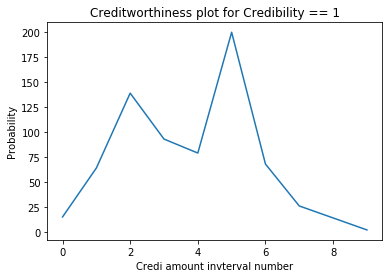

In [38]:
plt.plot(compareCreditWorthinessDf.Credibility1)
plt.xlabel('Credi amount invterval number')
plt.ylabel('Probability')
plt.title('Creditworthiness plot for Credibility == 1')

# 6. Prepare input data for the model

In [43]:
X = np.array(creditdf.CreditAmount)
y = creditdf.Creditability.astype('category')
creditdf.dtypes
type(y)

pandas.core.series.Series

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 40)


# 7. Fit logistic regression model

In [47]:
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.598979
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.018     
Dependent Variable: Creditability    AIC:              842.5704  
Date:               2019-12-27 17:24 BIC:              851.6726  
No. Observations:   700              Log-Likelihood:   -419.29   
Df Model:           1                LL-Null:          -426.75   
Df Residuals:       698              LLR p-value:      0.00011109
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.2289     0.1303    9.4351   0.0000    0.9737    1.4842
x1        -0.0001     0.0000   -3.8662   0.0001   -0.0002   -0.0001
=================================================================

"""

# 8. Test accuracy calculation

In [48]:
def get_predictions(y_test, model):
    y_pred_df = pd.DataFrame({'actual' : y_test, 'predicted_prob': lg.predict(sm.add_constant(X_test))})
    return y_pred_df

X_test[0:5]

array([3763, 1867, 4583, 1113, 1936])

In [51]:
y_pred_df = get_predictions(X_test, lg)
y_pred_df['originalCredibility'] = np.array(y_test)
y_pred_df.head()

,actual,predicted_prob,originalCredibility
0,3763,0.693810,1
1,1867,0.735955,1
2,4583,0.674463,1
3,1113,0.751643,1
4,1936,0.734488,1


# 9. Build a confusion matrix

In [53]:
from sklearn import metrics
from sklearn import datasets

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Default", "No Default"], yticklabels=["Deafult", "No Default"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [54]:
draw_cm(y_pred_df.originalCredibility, y_pred_df.predicted)

AttributeError: 'DataFrame' object has no attribute 'predicted'

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults